In [91]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results", "05-29-main-exp-6-expert"))
print("Length:", len(df))

df = df[~df["dataset"].str.contains("newsgroup")]
df["seed_dataset_size"] = df["select_seed_dataset"].str.extract(r"(\d+)").astype(int)

print(
    df["base_model_name_or_path"].value_counts()
)

Found 301 files in /home/jxm/reverse-training/results/05-29-main-exp-6-expert/*.pkl
Filtered 0/301 results with no evaluation metrics
dict_keys(['data', 'time_elapsed', 'full_ot_distance', 'sinkhorn_distance', 'optimal_matching_relaxed_wmd', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'containment_similarity_examples', 'containment_similarity_vocabulary', 'levenshtein_stats', 'discrete_ot_distance_levenshtein', 'discrete_ot_distance_jaccard', 'args', 'expert_evaluation_metrics', 'evaluation_metrics', 'total_time_in_evaluation'])
Length: 301
base_model_name_or_path
gpt2                        153
TinyLlama/TinyLlama_v1.1    148
Name: count, dtype: int64


In [109]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "base_model_name_or_path",  "select_full_dataset_size", "select_batch_fill_strategy", ]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_full_ot_distance", "dataset_jaccard_overlap_vocabulary"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=dv_cols, 
    ascending=False
)

evaluation_best_eval_accuracy  \
dataset       select_seed_dataset base_model_name_or_path  select_full_dataset_size select_batch_fill_strategy                                  
dbpedia_10000 nq_10000            gpt2                     2500                     topk                                             0.394857   
                                                                                    random                                           0.757324   
                                                                                    greedy_batched                                   0.764486   
                                                                                    greedy                                           0.745768   
                                                           1000                     topk                                             0.255046   
                                                                                    random                                           0.673665   
                                                                                    greedy_batched                                   0.707520   
                                                                                    greedy                                           0.701660   
                                                           500                      topk                                             0.171549   
                                                                                    random                                           0.533203   
                                                                                    greedy_batched                                   0.617513   
                                                                                    greedy                                           0.642578   
                                                           100                      topk                                             0.077962   
                                                                                    random                                           0.197266   
                                                                                    greedy_batched                                   0.261882   
                                                                                    greedy                                           0.258301   
                                  TinyLlama/TinyLlama_v1.1 2500                     topk                                             0.807780   
                                                                                    random                                           0.806478   
                                                                                    greedy_batched                                   0.839844   
                                                                                    greedy                                           0.840820   
                                                           1000                     topk                                             0.704915   
                                                                                    random                                           0.740072   
                                                                                    greedy_batched                                   0.835449   
                                                                                    greedy                                           0.833984   
                                                           500                      topk                                             0.523763   
                                                                                    random                                           0.601074   
                                                    

In [90]:
final_df = df[
    (df["select_full_dataset_size"] == 1000) #& 
    # (df["select_batch_fill_strategy"] != "bottomk")
]
final_df = final_df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)
final_df

,,,,,evaluation_best_eval_accuracy,dataset_sinkhorn_distance,dataset_full_ot_distance,dataset_jaccard_overlap_vocabulary
dataset,select_seed_dataset,base_model_name_or_path,select_full_dataset_size,select_batch_fill_strategy,,,,


In [1149]:

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]
iv_cols = [
    "evaluation_best_eval_accuracy", 
    "evaluation_best_eval_loss", 
    # "dataset_jaccard_overlap_vocabulary", 
    # "dataset_levenshtein_stats_average_distance", 
    "dataset_full_ot_distance",
    # "dataset_containment_similarity_examples", 
    "dataset_containment_similarity_vocabulary", 
    # "dataset_discrete_ot_distance_levenshtein", 
    # "dataset_discrete_ot_distance_jaccard"
]


# Final results: dataset size 1000, batch fill strategy is not bottomk
final_df = df[
    (df["select_full_dataset_size"] == 1000) & 
    (df["select_batch_fill_strategy"] != "bottomk")
].reset_index()
final_df["evaluation_best_eval_accuracy"] = final_df["evaluation_best_eval_accuracy"] * 100
final_df = final_df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)



final_df = final_df.reset_index()
final_df = final_df.pivot(index=["select_batch_fill_strategy"], columns=["dataset"], values=iv_cols)
final_df = final_df.swaplevel(0, 1, axis=1)
final_df = final_df.sort_index(axis=1)


# rename all the columns
print(final_df.columns)
final_df.columns = [col for _, col in final_df.columns]
final_df.columns = [col.replace("evaluation_best_eval_accuracy", "Acc") for col in final_df.columns]
final_df.columns = [col.replace("evaluation_best_eval_loss", "Loss") for col in final_df.columns]
final_df.columns = [col.replace("dataset_jaccard_overlap_vocabulary", "Jaccard Vocab") for col in final_df.columns]
final_df.columns = [col.replace("dataset_levenshtein_stats_average_distance", "Levenshtein") for col in final_df.columns]
final_df.columns = [col.replace("dataset_full_ot_distance", "OTD") for col in final_df.columns]
final_df.columns = [col.replace("dataset_discrete_ot_distance_levenshtein", "OTD Levenshtein") for col in final_df.columns]
final_df.columns = [col.replace("dataset_discrete_ot_distance_jaccard", "OTD Jaccard") for col in final_df.columns]
final_df.columns = [col.replace("dataset_containment_similarity_examples", "Containment Examples") for col in final_df.columns]
final_df.columns = [col.replace("dataset_containment_similarity_vocabulary", "Vocab") for col in final_df.columns]

print(final_df.to_latex(float_format=lambda x: f"{x:.2f}", escape=True))

KeyError: "Columns not found: 'dataset_containment_similarity_vocabulary'"

In [995]:
[col for col in df.columns if "loss" in col]

['expert_evaluation_best_eval_loss', 'evaluation_best_eval_loss']

In [997]:
df.groupby("dataset")[["expert_evaluation_best_eval_accuracy", "expert_evaluation_best_eval_loss"]].mean()

,expert_evaluation_best_eval_accuracy,expert_evaluation_best_eval_loss
dataset,,
ag_news_10000,0.883138,0.402837
dbpedia_10000,0.883570,0.423583
imdb_10000,0.813802,0.509870


In [991]:
# rename all the columns
final_df.columns = [(_, col.replace("evaluation_best_eval_accuracy", "Acc")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("evaluation_best_eval_loss", "Loss")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("dataset_jaccard_overlap_vocabulary", "Jaccard Vocab")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("dataset_levenshtein_stats_average_distance", "Levenshtein")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("dataset_full_ot_distance", "OTD")) for _, col in final_df.columns]



print(final_df.to_latex(float_format=lambda x: f"{x:.3f}", escape=True))

ValueError: too many values to unpack (expected 2)

findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

Saved plot to /home/jxm/reverse-training/figures/03-23-fig2-scaling-selection-size.pdf.


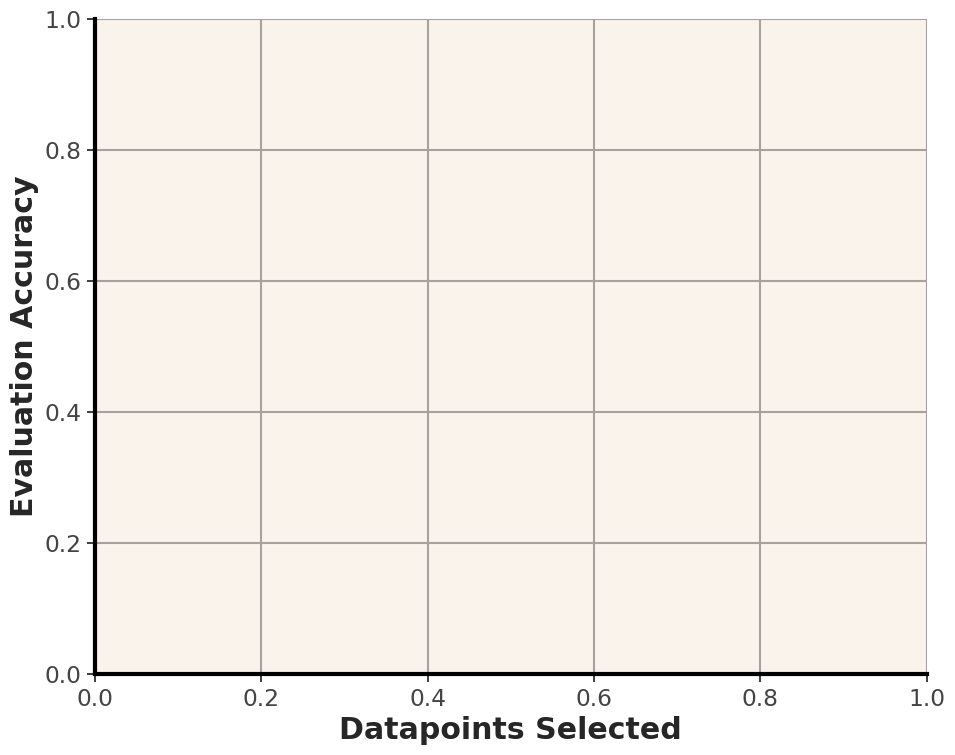

<Axes: xlabel='Datapoints Selected', ylabel='Evaluation Accuracy'>

In [948]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

from utils.plot_utils import plot_df

one_df = (
    df[(df["select_seed_dataset"] == "nq_10000") & (df["dataset"] == "ag_news_10000") & (df["base_model_name_or_path"] == "tinyllama")] 
        .groupby(["select_batch_fill_strategy", "select_full_dataset_size"])["evaluation_best_eval_accuracy"] 
        .mean()
        .reset_index()
)
# ax = sns.lineplot(data=one_df, x="select_full_dataset_size", y="evaluation_best_eval_accuracy", hue="select_batch_fill_strategy", lw=2, marker="o", markersize=8)
# ax.set_xlabel("Datapoints Selected")
# ax.set_ylabel("Evaluation Accuracy")

plot_df(
    kind="line",
    df=one_df,
    x="select_full_dataset_size",
    y="evaluation_best_eval_accuracy",
    hue="select_batch_fill_strategy",
    lw=4,
    marker="o",
    markersize=12,
    xlabel="Datapoints Selected",
    ylabel="Evaluation Accuracy",
    save_path="/home/jxm/reverse-training/figures/03-23-fig2-scaling-selection-size.pdf",
    legend_loc="lower right",
    custom_legend_labels={
        "greedy": "SELECT",
        "greedy_batched": "SELECT (Batch)",
        "random": "Random",
        "topk": "Top-K",
        "topk_balanced": "Top-K Balanced",
        "bottomk": "Bottom-K",
    },
    logx=False,
    logy=False,
)

,select_batch_fill_strategy,seed_dataset_size,evaluation_best_eval_accuracy
0,bottomk,10000,0.434774
1,bottomk,100000,0.368001
2,greedy,10000,0.695394
3,greedy,100000,0.668783
4,greedy_batched,10000,0.633382
5,greedy_batched,20000,0.623739
6,greedy_batched,50000,0.601318
7,greedy_batched,100000,0.593709
8,greedy_batched,200000,0.595215
10,random,10000,0.605387


findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.


findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

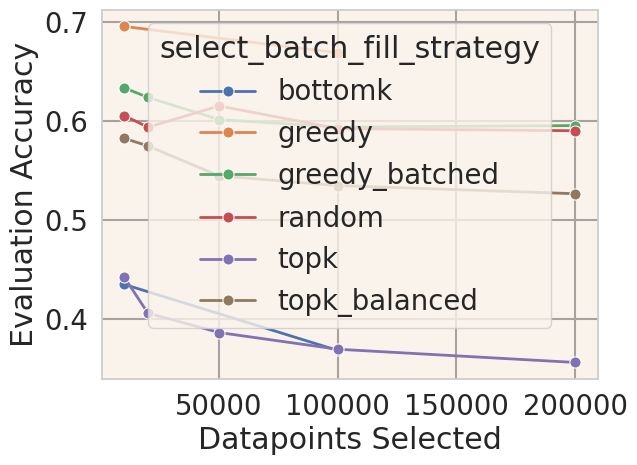

In [862]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

one_df = (
    df[(df["dataset"].str.startswith("ag"))] 
        .groupby(["select_batch_fill_strategy", "seed_dataset_size"])["evaluation_best_eval_accuracy"] 
        .mean()
        .reset_index()
)
one_df = one_df[one_df["seed_dataset_size"] <= 500_000]
ax = sns.lineplot(data=one_df, x="seed_dataset_size", y="evaluation_best_eval_accuracy", hue="select_batch_fill_strategy", lw=2, marker="o", markersize=8)
ax.set_xlabel("Datapoints Selected")
ax.set_ylabel("Evaluation Accuracy")
one_df

Text(0, 0.5, 'OTD')

findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

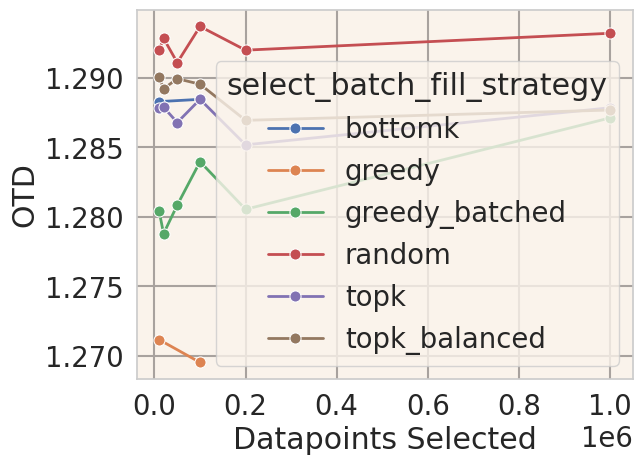

In [864]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

one_df = (
    df[(df["dataset"].str.startswith("ag"))] 
        .groupby(["select_batch_fill_strategy", "seed_dataset_size"])["dataset_sinkhorn_distance"] 
        .mean()
        .reset_index()
)
# one_df = one_df[one_df["seed_dataset_size"] <= 500_000]
ax = sns.lineplot(data=one_df, x="seed_dataset_size", y="dataset_sinkhorn_distance", hue="select_batch_fill_strategy", lw=2, marker="o", markersize=8)
ax.set_xlabel("Datapoints Selected")
ax.set_ylabel("OTD")


In [681]:
df["dataset_size"].value_counts()

dataset_size
100    589
Name: count, dtype: int64